# Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, multilabel_confusion_matrix,classification_report,hamming_loss
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/REALTYM.csv")

In [ ]:
data

,Unnamed: 0,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,...,polycystic ovary,smoking,exercise,Diabetic,vascular issues,heart issues,central nervous system issues,diabetic retinopathy issues,kidney issues,nerves issues
0,0,1.3,122,9.0,230,34,132,178,31,M,...,N,Y,N,Y,N,N,N,N,N,N
1,1,2.0,110,7.8,268,59,121,145,57,M,...,N,Y,N,Y,N,Y,N,N,N,N
2,2,1.9,140,7.0,190,34,165,121,62,M,...,N,N,N,Y,N,Y,N,N,Y,N
3,3,1.6,134,5.0,229,65,165,190,59,F,...,N,N,N,Y,N,N,N,N,N,N
4,4,1.6,122,5.0,268,57,178,157,23,M,...,Y,N,N,Y,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.1,145,6.0,187,41,178,200,25,F,...,N,N,Y,Y,N,N,Y,N,N,Y
14996,14996,1.9,200,9.0,198,41,133,166,32,F,...,Y,N,N,Y,N,N,Y,N,N,N
14997,14997,1.1,160,5.0,312,56,159,180,37,F,...,N,N,N,N,N,N,N,Y,N,N
14998,14998,2.3,123,5.8,230,37,189,200,62,M,...,N,N,N,Y,N,Y,N,Y,N,N


# EDA-Exploratory Data Analysis

In [ ]:
#shape
data.shape

(15000, 26)

In [ ]:
data = data.drop(columns = ['Unnamed: 0'])

In [ ]:
data.sample(20)

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,...,polycystic ovary,smoking,exercise,Diabetic,vascular issues,heart issues,central nervous system issues,diabetic retinopathy issues,kidney issues,nerves issues
13637,1.0,110,5.0,230,54,132,200,28,F,42,...,Y,Y,N,N,Y,N,N,N,N,N
14522,1.3,134,7.0,166,37,179,178,25,M,45,...,Y,Y,N,Y,N,Y,Y,N,N,N
4813,1.6,160,5.8,166,34,190,167,28,F,66,...,Y,Y,Y,N,N,N,N,N,N,N
3016,1.1,140,7.0,229,45,178,144,22,F,54,...,Y,N,Y,N,N,Y,N,N,N,N
4534,0.6,156,7.0,281,34,178,200,48,F,54,...,N,Y,N,Y,N,Y,Y,N,N,N
9445,1.8,150,5.9,220,55,132,190,44,M,55,...,N,Y,N,Y,N,N,N,N,N,N
14695,1.0,145,6.0,230,40,155,155,31,M,65,...,N,N,N,N,N,N,N,N,N,N
10411,1.2,123,6.5,256,46,112,179,31,M,54,...,Y,Y,N,N,N,N,Y,N,Y,N
1739,1.2,140,5.0,312,55,159,146,78,F,57,...,Y,Y,N,N,N,N,N,N,Y,N
6275,1.0,110,6.0,300,46,130,145,37,M,44,...,N,N,N,Y,N,N,N,N,N,N


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   serum creatine                 15000 non-null  float64
 1   blood sugar fasting            15000 non-null  int64  
 2   glycosalated hb HBA1C          15000 non-null  float64
 3   serum cholesterol              15000 non-null  int64  
 4   hdl cholesterol                15000 non-null  int64  
 5   ldl cholesterol                15000 non-null  int64  
 6   triglyceride                   15000 non-null  int64  
 7   vldl cholesterol               15000 non-null  int64  
 8   sex                            15000 non-null  object 
 9   age                            15000 non-null  int64  
 10  BMI                            15000 non-null  int64  
 11  family history                 15000 non-null  object 
 12  diastolic BP                   15000 non-null 

In [ ]:
#missing values
data.isnull().sum()

serum creatine                   0
blood sugar fasting              0
glycosalated hb HBA1C            0
serum cholesterol                0
hdl cholesterol                  0
ldl cholesterol                  0
triglyceride                     0
vldl cholesterol                 0
sex                              0
age                              0
BMI                              0
family history                   0
diastolic BP                     0
systolic BP                      0
gestation(pregnancies)           0
polycystic ovary                 0
smoking                          0
exercise                         0
Diabetic                         0
vascular issues                  0
heart issues                     0
central nervous system issues    0
diabetic retinopathy issues      0
kidney issues                    0
nerves issues                    0
dtype: int64

In [ ]:
data.describe()

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,age,BMI,diastolic BP,systolic BP,gestation(pregnancies)
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.507467,149.361733,6.773847,225.610000,45.982533,157.264267,161.059533,45.7954,53.576200,33.532533,84.448267,138.625933,0.975667
std,0.461790,24.361087,1.136035,40.757389,8.888279,26.008482,22.906399,19.9030,12.441489,4.966010,5.686652,11.414104,1.243588
min,0.600000,110.000000,5.000000,166.000000,34.000000,112.000000,121.000000,22.0000,31.000000,26.000000,78.000000,112.000000,0.000000
25%,1.100000,130.000000,6.000000,198.000000,39.000000,132.000000,145.000000,28.0000,44.000000,29.000000,80.000000,130.000000,0.000000
50%,1.600000,145.000000,7.000000,220.000000,44.000000,159.000000,165.000000,44.0000,54.000000,34.000000,84.000000,140.000000,0.000000
75%,1.900000,160.000000,7.800000,256.000000,55.000000,186.000000,178.000000,59.0000,65.000000,37.000000,90.000000,150.000000,2.000000
max,2.300000,200.000000,9.000000,312.000000,65.000000,190.000000,200.000000,90.0000,77.000000,42.000000,100.000000,155.000000,4.000000


In [ ]:
data.duplicated().sum()

0

# Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Diabetic'] = encoder.fit_transform(data['Diabetic'])
data['vascular issues'] = encoder.fit_transform(data['vascular issues'])
data['heart issues'] = encoder.fit_transform(data['heart issues'])
data['central nervous system issues'] = encoder.fit_transform(data['central nervous system issues'])
data['diabetic retinopathy issues'] = encoder.fit_transform(data['diabetic retinopathy issues'])
data['kidney issues'] = encoder.fit_transform(data['kidney issues'])
data['nerves issues'] = encoder.fit_transform(data['nerves issues'])

In [ ]:
data['sex'] = encoder.fit_transform(data['sex'])
data['smoking'] = encoder.fit_transform(data['smoking'])
data['polycystic ovary'] = encoder.fit_transform(data['polycystic ovary'])
data['family history'] = encoder.fit_transform(data['family history'])
data['exercise'] = encoder.fit_transform(data['exercise'])

In [ ]:
data.sample(20)

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,...,polycystic ovary,smoking,exercise,Diabetic,vascular issues,heart issues,central nervous system issues,diabetic retinopathy issues,kidney issues,nerves issues
8298,2.0,178,7.0,281,57,129,146,59,0,66,...,0,1,0,1,0,0,1,0,0,0
8986,1.6,122,5.9,199,55,189,145,45,1,34,...,1,0,0,1,0,0,0,0,0,0
5149,1.2,178,5.0,270,59,178,121,31,1,45,...,1,0,0,1,0,0,0,0,1,0
2260,2.0,156,7.0,230,34,121,177,22,0,57,...,0,0,0,0,0,0,0,0,0,0
11329,1.8,166,7.8,220,59,133,190,28,1,77,...,0,0,1,1,0,1,1,0,0,0
13453,1.6,145,7.0,200,54,112,200,32,1,66,...,0,1,0,1,0,0,0,0,0,0
4874,1.9,140,6.0,178,40,124,155,62,1,71,...,0,1,1,0,0,0,1,0,0,0
12466,1.3,160,6.5,200,39,145,145,37,0,66,...,1,1,1,0,0,1,0,1,1,0
9486,1.3,160,7.0,270,45,159,121,59,1,57,...,1,1,0,1,0,0,0,1,0,0
348,1.3,140,8.0,220,39,121,165,22,1,56,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
#colleration
data.corr()

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,...,polycystic ovary,smoking,exercise,Diabetic,vascular issues,heart issues,central nervous system issues,diabetic retinopathy issues,kidney issues,nerves issues
serum creatine,1.000000,-0.004862,-0.001110,-0.006237,0.001245,-0.000365,0.003108,-0.005950,-0.009836,-0.002754,...,0.001800,0.002012,0.002233,0.007558,0.005492,0.007302,0.007731,0.002330,0.001636,0.020030
blood sugar fasting,-0.004862,1.000000,-0.003050,0.005074,0.011188,0.005734,0.007930,0.003032,-0.003956,-0.008186,...,0.004536,0.021329,0.017979,-0.009180,0.002592,0.011077,0.006063,-0.008174,0.003152,0.005730
glycosalated hb HBA1C,-0.001110,-0.003050,1.000000,-0.007259,-0.005063,0.004133,0.004008,0.001329,0.011563,-0.005062,...,0.011663,-0.005827,-0.001676,-0.008631,0.017508,-0.003238,0.006466,-0.010178,0.011228,0.009182
serum cholesterol,-0.006237,0.005074,-0.007259,1.000000,0.005775,0.004281,-0.001064,-0.014788,0.001858,-0.005199,...,0.005716,-0.001804,-0.007006,-0.007509,-0.002402,0.000691,0.003996,0.005624,-0.011877,-0.002994
hdl cholesterol,0.001245,0.011188,-0.005063,0.005775,1.000000,0.004310,0.001772,0.001825,0.005820,0.002004,...,0.005810,-0.001555,-0.003442,-0.008705,0.013326,0.003545,0.001299,0.013223,0.007163,-0.001946
ldl cholesterol,-0.000365,0.005734,0.004133,0.004281,0.004310,1.000000,0.009533,-0.008779,0.003700,-0.001283,...,-0.005242,-0.002122,-0.000490,-0.003987,-0.011971,0.002122,0.002986,-0.003292,0.007081,0.009824
triglyceride,0.003108,0.007930,0.004008,-0.001064,0.001772,0.009533,1.000000,-0.008479,-0.014458,-0.004420,...,0.000201,-0.003121,0.002479,-0.011691,-0.008086,0.005888,0.011222,0.000504,0.002001,-0.006688
vldl cholesterol,-0.005950,0.003032,0.001329,-0.014788,0.001825,-0.008779,-0.008479,1.000000,0.000732,0.002899,...,-0.007501,-0.004806,0.008757,0.011806,-0.000329,-0.006019,0.009423,0.000165,-0.005629,0.001511
sex,-0.009836,-0.003956,0.011563,0.001858,0.005820,0.003700,-0.014458,0.000732,1.000000,0.007229,...,0.003020,0.000011,0.002360,0.000433,-0.001796,-0.003755,-0.006272,0.003955,-0.007411,-0.007284
age,-0.002754,-0.008186,-0.005062,-0.005199,0.002004,-0.001283,-0.004420,0.002899,0.007229,1.000000,...,-0.016015,0.007857,0.000193,-0.001333,-0.005764,0.015377,-0.009128,0.002571,-0.009751,-0.007302


In [ ]:
data.corr()['heart issues']

serum creatine                   0.007302
blood sugar fasting              0.011077
glycosalated hb HBA1C           -0.003238
serum cholesterol                0.000691
hdl cholesterol                  0.003545
ldl cholesterol                  0.002122
triglyceride                     0.005888
vldl cholesterol                -0.006019
sex                             -0.003755
age                              0.015377
BMI                             -0.007361
family history                   0.006487
diastolic BP                    -0.002522
systolic BP                      0.001035
gestation(pregnancies)          -0.003562
polycystic ovary                -0.001251
smoking                          0.005215
exercise                        -0.015961
Diabetic                         0.005811
vascular issues                  0.008578
heart issues                     1.000000
central nervous system issues   -0.017610
diabetic retinopathy issues      0.013561
kidney issues                   -0

In [ ]:
data.corr()['vascular issues']

serum creatine                   0.005492
blood sugar fasting              0.002592
glycosalated hb HBA1C            0.017508
serum cholesterol               -0.002402
hdl cholesterol                  0.013326
ldl cholesterol                 -0.011971
triglyceride                    -0.008086
vldl cholesterol                -0.000329
sex                             -0.001796
age                             -0.005764
BMI                              0.002383
family history                  -0.008102
diastolic BP                     0.008857
systolic BP                     -0.007086
gestation(pregnancies)           0.009119
polycystic ovary                 0.000120
smoking                          0.000239
exercise                         0.001326
Diabetic                        -0.005439
vascular issues                  1.000000
heart issues                     0.008578
central nervous system issues   -0.002938
diabetic retinopathy issues      0.012809
kidney issues                    0

In [ ]:
data.head(5)

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,...,polycystic ovary,smoking,exercise,Diabetic,vascular issues,heart issues,central nervous system issues,diabetic retinopathy issues,kidney issues,nerves issues
0,1.3,122,9.0,230,34,132,178,31,1,54,...,0,1,0,1,0,0,0,0,0,0
1,2.0,110,7.8,268,59,121,145,57,1,42,...,0,1,0,1,0,1,0,0,0,0
2,1.9,140,7.0,190,34,165,121,62,1,77,...,0,0,0,1,0,1,0,0,1,0
3,1.6,134,5.0,229,65,165,190,59,0,55,...,0,0,0,1,0,0,0,0,0,0
4,1.6,122,5.0,268,57,178,157,23,1,54,...,1,0,0,1,0,0,0,0,0,0


# Pre-Processing

In [ ]:

from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
scaler = StandardScaler()
standardized = scaler.fit_transform(data[['serum creatine' , 	'blood sugar fasting' ,	'glycosalated hb HBA1C',	'serum cholesterol',
                                          'hdl cholesterol',	'ldl cholesterol',	'triglyceride',	'vldl cholesterol',	'sex',	'age',
                                          'BMI',	'family history',	'diastolic BP',	'systolic BP',	'gestation(pregnancies)',	'polycystic ovary',
                                          'smoking',	'exercise']])



In [ ]:
predata = pd.DataFrame(standardized,columns = ['serum creatine' , 	'blood sugar fasting' ,	'glycosalated hb HBA1C',	'serum cholesterol',
                                               'hdl cholesterol',	'ldl cholesterol',	'triglyceride',	'vldl cholesterol',	'sex',	'age',
                                               'BMI',	'family history',	'diastolic BP',	'systolic BP',	'gestation(pregnancies)',
                                               'polycystic ovary',	'smoking',	'exercise'])
predata

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,BMI,family history,diastolic BP,systolic BP,gestation(pregnancies),polycystic ovary,smoking,exercise
0,-0.449281,-1.123211,1.959648,0.107714,-1.348173,-0.971418,0.739576,-0.743400,1.070621,0.034065,0.295512,0.528815,0.976307,1.434595,0.019568,-0.962695,0.974719,-0.502707
1,1.066609,-1.615816,0.903307,1.040091,1.464614,-1.394371,-0.701117,0.562979,1.070621,-0.930482,-0.509990,0.528815,-0.782256,0.996526,0.823719,-0.962695,0.974719,-0.502707
2,0.850053,-0.384303,0.199079,-0.873736,-1.348173,0.297441,-1.748894,0.814206,1.070621,1.882780,1.705141,0.528815,-1.133968,0.383229,1.627871,-0.962695,-1.025936,-0.502707
3,0.200386,-0.630606,-1.561489,0.083178,2.139683,0.297441,1.263465,0.663470,-0.934037,0.114443,-0.107239,0.528815,0.272882,0.996526,-0.784584,-0.962695,-1.025936,-0.502707
4,0.200386,-1.123211,-1.561489,1.040091,1.239591,0.797295,-0.177229,-1.145363,1.070621,0.034065,1.101015,-1.891021,-0.430543,-0.843365,-0.784584,1.038750,-1.025936,-0.502707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.283164,-0.179051,-0.681205,-0.947344,-0.560592,0.797295,1.700039,-1.044872,-0.934037,1.400506,1.503766,-1.891021,-1.133968,0.120387,0.019568,-0.962695,-1.025936,1.989231
14996,0.850053,2.078723,1.959648,-0.677446,-0.560592,-0.932968,0.215688,-0.693155,-0.934037,0.194822,-1.516869,-1.891021,-1.133968,1.084139,-0.784584,1.038750,-1.025936,-0.502707
14997,-0.882392,0.436706,-1.561489,2.119686,1.127080,0.066739,0.826891,-0.441928,-0.934037,0.275201,0.496888,0.528815,0.097026,-0.668137,0.823719,-0.962695,-1.025936,-0.502707
14998,1.716276,-1.082161,-0.857262,0.107714,-1.010638,1.220248,1.700039,0.814206,1.070621,-0.769725,-1.114117,0.528815,-1.133968,1.084139,0.823719,-0.962695,-1.025936,-0.502707


In [ ]:
predata.sample(5)

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,BMI,family history,diastolic BP,systolic BP,gestation(pregnancies),polycystic ovary,smoking,exercise
1596,0.633497,0.683008,1.079363,-0.137648,-1.010638,1.220248,0.826891,2.221076,-0.934037,0.918233,1.302390,0.528815,-1.133968,0.558456,-0.784584,1.03875,0.974719,-0.502707
7629,-0.232725,2.078723,0.199079,1.359063,-0.785615,1.104897,-0.264543,-0.743400,-0.934037,0.275201,0.295512,0.528815,-0.430543,0.470843,0.823719,1.03875,0.974719,1.989231
4749,-0.232725,-1.615816,0.199079,-1.462606,-1.010638,1.104897,1.700039,-0.894136,-0.934037,0.194822,-1.114117,0.528815,-0.430543,0.120387,-0.784584,1.03875,-1.025936,-0.502707
7093,-1.098948,1.175613,0.903307,1.040091,-1.010638,-0.240863,0.739576,0.110771,-0.934037,-0.448209,1.302390,0.528815,0.097026,0.470843,-0.784584,1.03875,-1.025936,1.989231
628,-0.232725,-1.615816,0.199079,1.825251,-0.673104,1.104897,1.263465,-0.039965,-0.934037,-0.930482,-0.509990,0.528815,-1.133968,0.470843,0.019568,1.03875,-1.025936,-0.502707


# Data Plotting

<Axes: >

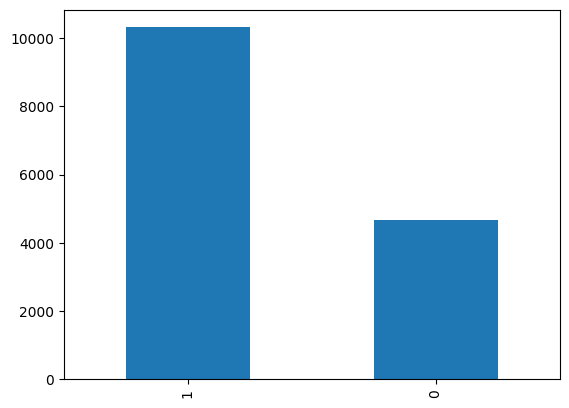

In [ ]:
data['Diabetic'].value_counts().plot(kind = 'bar')

<Axes: >

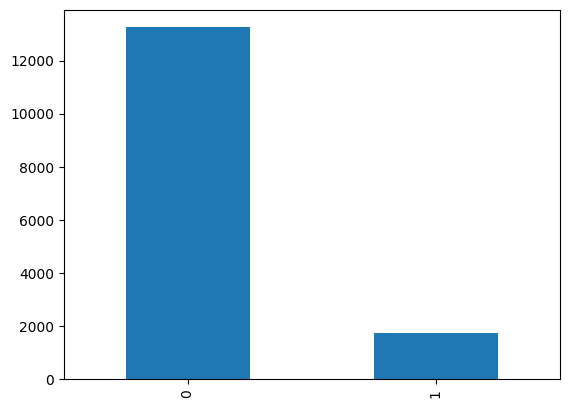

In [ ]:
data['vascular issues'].value_counts().plot(kind = 'bar')

<Axes: >

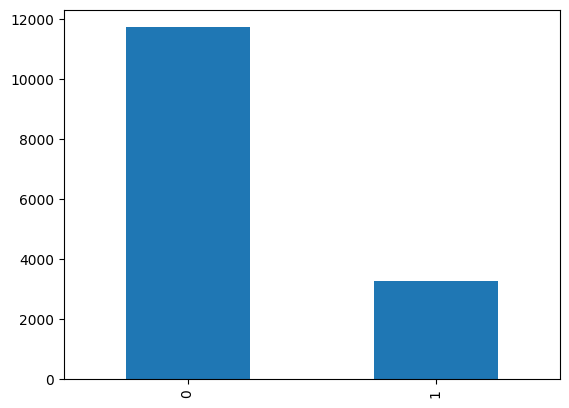

In [ ]:
data['heart issues'].value_counts().plot(kind = 'bar')

<Axes: >

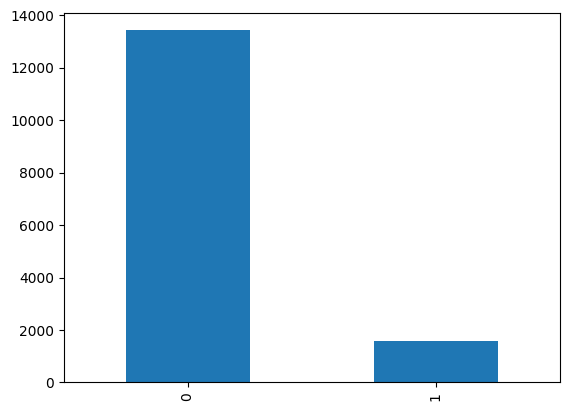

In [ ]:
data['kidney issues'].value_counts().plot(kind = 'bar')

<Axes: >

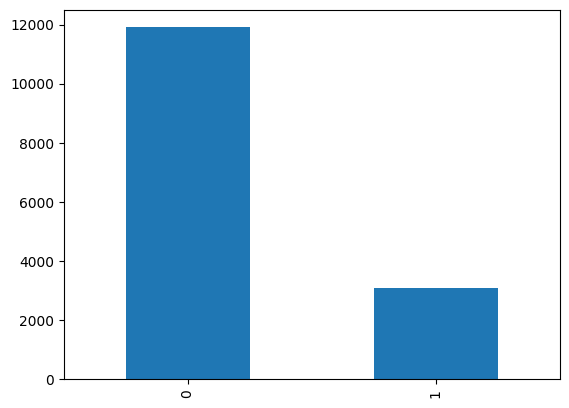

In [ ]:
data['central nervous system issues'].value_counts().plot(kind = 'bar')

<Axes: >

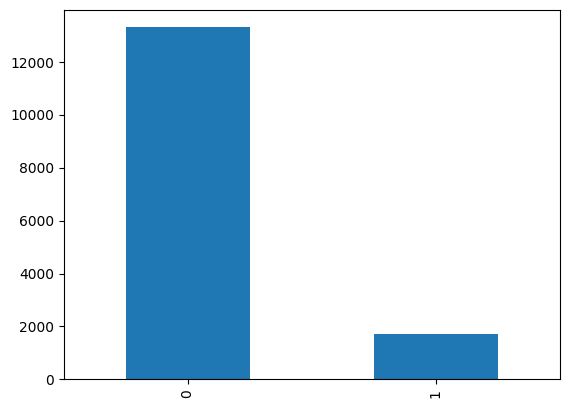

In [ ]:
data['diabetic retinopathy issues'].value_counts().plot(kind = 'bar')

<Axes: >

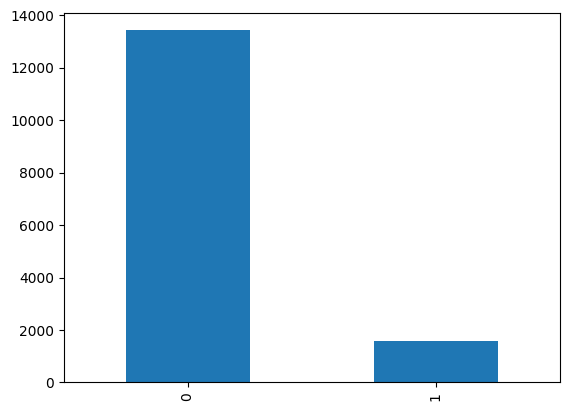

In [ ]:
data['kidney issues'].value_counts().plot(kind = 'bar')

In [ ]:
FEATURES = predata
FEATURES

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,BMI,family history,diastolic BP,systolic BP,gestation(pregnancies),polycystic ovary,smoking,exercise
0,-0.449281,-1.123211,1.959648,0.107714,-1.348173,-0.971418,0.739576,-0.743400,1.070621,0.034065,0.295512,0.528815,0.976307,1.434595,0.019568,-0.962695,0.974719,-0.502707
1,1.066609,-1.615816,0.903307,1.040091,1.464614,-1.394371,-0.701117,0.562979,1.070621,-0.930482,-0.509990,0.528815,-0.782256,0.996526,0.823719,-0.962695,0.974719,-0.502707
2,0.850053,-0.384303,0.199079,-0.873736,-1.348173,0.297441,-1.748894,0.814206,1.070621,1.882780,1.705141,0.528815,-1.133968,0.383229,1.627871,-0.962695,-1.025936,-0.502707
3,0.200386,-0.630606,-1.561489,0.083178,2.139683,0.297441,1.263465,0.663470,-0.934037,0.114443,-0.107239,0.528815,0.272882,0.996526,-0.784584,-0.962695,-1.025936,-0.502707
4,0.200386,-1.123211,-1.561489,1.040091,1.239591,0.797295,-0.177229,-1.145363,1.070621,0.034065,1.101015,-1.891021,-0.430543,-0.843365,-0.784584,1.038750,-1.025936,-0.502707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.283164,-0.179051,-0.681205,-0.947344,-0.560592,0.797295,1.700039,-1.044872,-0.934037,1.400506,1.503766,-1.891021,-1.133968,0.120387,0.019568,-0.962695,-1.025936,1.989231
14996,0.850053,2.078723,1.959648,-0.677446,-0.560592,-0.932968,0.215688,-0.693155,-0.934037,0.194822,-1.516869,-1.891021,-1.133968,1.084139,-0.784584,1.038750,-1.025936,-0.502707
14997,-0.882392,0.436706,-1.561489,2.119686,1.127080,0.066739,0.826891,-0.441928,-0.934037,0.275201,0.496888,0.528815,0.097026,-0.668137,0.823719,-0.962695,-1.025936,-0.502707
14998,1.716276,-1.082161,-0.857262,0.107714,-1.010638,1.220248,1.700039,0.814206,1.070621,-0.769725,-1.114117,0.528815,-1.133968,1.084139,0.823719,-0.962695,-1.025936,-0.502707


In [ ]:
labels = data.iloc[:,18:]
labels

,Diabetic,vascular issues,heart issues,central nervous system issues,diabetic retinopathy issues,kidney issues,nerves issues
0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
14995,1,0,0,1,0,0,1
14996,1,0,0,1,0,0,0
14997,0,0,0,0,1,0,0
14998,1,0,1,0,1,0,0


# Data Splitting using ML models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FEATURES, labels, test_size=0.20, random_state=42)

In [ ]:
X_train

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,BMI,family history,diastolic BP,systolic BP,gestation(pregnancies),polycystic ovary,smoking,exercise
9839,-0.665836,2.078723,1.959648,2.119686,0.001965,-1.740424,0.826891,-0.090211,-0.934037,-0.769725,0.698263,0.528815,-1.133968,0.470843,-0.784584,-0.962695,-1.025936,-0.502707
9680,0.633497,-0.179051,1.959648,1.040091,-1.348173,-0.471564,-0.613802,0.110771,1.070621,0.114443,1.101015,0.528815,2.734870,0.383229,-0.784584,1.038750,0.974719,-0.502707
7093,-1.098948,1.175613,0.903307,1.040091,-1.010638,-0.240863,0.739576,0.110771,-0.934037,-0.448209,1.302390,0.528815,0.097026,0.470843,-0.784584,1.038750,-1.025936,1.989231
11293,-0.882392,2.078723,0.903307,0.745657,-0.448081,-0.471564,1.700039,-1.145363,1.070621,-1.573514,-1.114117,0.528815,-0.782256,-0.755751,1.627871,1.038750,0.974719,-0.502707
820,-0.232725,0.026201,0.199079,2.119686,0.001965,-1.740424,-1.661579,-0.441928,1.070621,-1.573514,0.496888,-1.891021,-0.782256,-0.755751,1.627871,1.038750,0.974719,1.989231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-1.098948,0.026201,-1.561489,0.107714,0.902057,-1.394371,0.826891,-0.894136,1.070621,1.078990,0.698263,0.528815,-0.782256,0.120387,0.823719,1.038750,-1.025936,-0.502707
13418,1.066609,-0.096950,1.079363,-1.168171,-0.785615,-0.240863,1.700039,0.663470,-0.934037,0.275201,0.094136,-1.891021,-1.133968,1.346981,-0.784584,1.038750,0.974719,-0.502707
5390,-0.665836,2.078723,1.959648,1.359063,-0.560592,1.258698,-0.657460,1.618132,-0.934037,0.194822,-0.308615,-1.891021,-1.133968,-1.544276,-0.784584,1.038750,-1.025936,-0.502707
860,0.850053,-0.179051,-0.681205,2.119686,1.464614,-1.394371,1.700039,-0.693155,-0.934037,-0.689346,1.503766,-1.891021,0.976307,0.470843,1.627871,1.038750,0.974719,-0.502707


In [ ]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
FEATURES

,serum creatine,blood sugar fasting,glycosalated hb HBA1C,serum cholesterol,hdl cholesterol,ldl cholesterol,triglyceride,vldl cholesterol,sex,age,BMI,family history,diastolic BP,systolic BP,gestation(pregnancies),polycystic ovary,smoking,exercise
0,-0.449281,-1.123211,1.959648,0.107714,-1.348173,-0.971418,0.739576,-0.743400,1.070621,0.034065,0.295512,0.528815,0.976307,1.434595,0.019568,-0.962695,0.974719,-0.502707
1,1.066609,-1.615816,0.903307,1.040091,1.464614,-1.394371,-0.701117,0.562979,1.070621,-0.930482,-0.509990,0.528815,-0.782256,0.996526,0.823719,-0.962695,0.974719,-0.502707
2,0.850053,-0.384303,0.199079,-0.873736,-1.348173,0.297441,-1.748894,0.814206,1.070621,1.882780,1.705141,0.528815,-1.133968,0.383229,1.627871,-0.962695,-1.025936,-0.502707
3,0.200386,-0.630606,-1.561489,0.083178,2.139683,0.297441,1.263465,0.663470,-0.934037,0.114443,-0.107239,0.528815,0.272882,0.996526,-0.784584,-0.962695,-1.025936,-0.502707
4,0.200386,-1.123211,-1.561489,1.040091,1.239591,0.797295,-0.177229,-1.145363,1.070621,0.034065,1.101015,-1.891021,-0.430543,-0.843365,-0.784584,1.038750,-1.025936,-0.502707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.283164,-0.179051,-0.681205,-0.947344,-0.560592,0.797295,1.700039,-1.044872,-0.934037,1.400506,1.503766,-1.891021,-1.133968,0.120387,0.019568,-0.962695,-1.025936,1.989231
14996,0.850053,2.078723,1.959648,-0.677446,-0.560592,-0.932968,0.215688,-0.693155,-0.934037,0.194822,-1.516869,-1.891021,-1.133968,1.084139,-0.784584,1.038750,-1.025936,-0.502707
14997,-0.882392,0.436706,-1.561489,2.119686,1.127080,0.066739,0.826891,-0.441928,-0.934037,0.275201,0.496888,0.528815,0.097026,-0.668137,0.823719,-0.962695,-1.025936,-0.502707
14998,1.716276,-1.082161,-0.857262,0.107714,-1.010638,1.220248,1.700039,0.814206,1.070621,-0.769725,-1.114117,0.528815,-1.133968,1.084139,0.823719,-0.962695,-1.025936,-0.502707


In [ ]:
labels

,Diabetic,vascular issues,heart issues,central nervous system issues,diabetic retinopathy issues,kidney issues,nerves issues
0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
14995,1,0,0,1,0,0,1
14996,1,0,0,1,0,0,0
14997,0,0,0,0,1,0,0
14998,1,0,1,0,1,0,0


In [ ]:
labels['Diabetic']

0        1
1        1
2        1
3        1
4        1
        ..
14995    1
14996    1
14997    0
14998    1
14999    0
Name: Diabetic, Length: 15000, dtype: int64

#MULTI LABEL MODELS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import BinaryRelevance

classifier = BinaryRelevance(GaussianNB())

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.29133333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB
classifier = ClassifierChain(RandomForestClassifier())
classifier.fit(X_train, y_train)

predictions1 = classifier.predict(X_test)
accuracy_score(predictions1,y_test)


0.2916666666666667

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(RandomForestClassifier())
classifier.fit(X_train, y_train)
predictions2 = classifier.predict(X_test)
accuracy_score(y_test,predictions2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.2796666666666667

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FEATURES, labels['Diabetic'], test_size=0.20, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression


k_best = SelectKBest(score_func=f_regression, k=6)  # You can adjust 'k' as needed
X_train_new = k_best.fit_transform(X_train, y_train)
X_test_new = k_best.transform(X_test)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Print the indices of the selected features
print("Indices of selected features:", selected_indices)


Indices of selected features: [ 1  2  4  6 10 14]


# Diabetic Issues

In [ ]:
x1 = FEATURES[['blood sugar fasting','BMI','age','diastolic BP', 'systolic BP','gestation(pregnancies)']]

In [ ]:
y1 = labels['Diabetic']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

from tensorflow.keras.models import Sequential
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_tr1, X_te1, y_tr1, y_ts1 = train_test_split(x1, y1, test_size=0.20, random_state=42)

In [ ]:
m1 = LogisticRegression()
m1.fit(X_tr1,y_tr1)
p1 = m1.predict(X_te1)
accuracy_score(p1,y_ts1)
#print(score)

0.702

In [ ]:
m2 = DecisionTreeClassifier()
m2.fit(X_tr1,y_tr1)
p2 = m2.predict(X_te1)
accuracy_score(p2,y_ts1)

0.5693333333333334

In [ ]:
m3 = RandomForestClassifier()
m3.fit(X_tr1,y_tr1)
p3 = m3.predict(X_te1)
accuracy_score(p3,y_ts1)

0.6556666666666666

In [ ]:
m4 = SVC(kernel = 'rbf')
m4.fit(X_tr1,y_tr1)
p4 = m4.predict(X_te1)
accuracy_score(p4,y_ts1)

0.702

In [ ]:
m5 = GaussianNB()
m5.fit(X_tr1,y_tr1)
p5 = m5.predict(X_te1)
accuracy_score(p5,y_ts1)

0.702

In [ ]:
dtrain = xgb.DMatrix(X_tr1, label=y_tr1)
dtest = xgb.DMatrix(X_te1, label=y_ts1)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 49
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Predict probabilities on the test set
y_pred_prob = model.predict(dtest)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_ts1, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:01:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
m6 = KNeighborsClassifier()
m6.fit(X_tr1,y_tr1)
p6 = m6.predict(X_te1)
accuracy_score(p6,y_ts1)

0.6216666666666667

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(6,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

model.fit(X_tr1,y_tr1, epochs=10, batch_size=64, validation_split=0.2)

y_pred = model.predict(X_te1)
mse = mean_squared_error(y_ts1, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

loss,accuracy = model.evaluate(X_te1,y_ts1)
print(f"Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

Epoch 1/10
150/150 [==============================] - 1s 4ms/step - loss: 0.2988 - accuracy: 0.5610 - val_loss: 0.2354 - val_accuracy: 0.6525
Epoch 2/10
150/150 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.6580 - val_loss: 0.2244 - val_accuracy: 0.6712
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.6760 - val_loss: 0.2216 - val_accuracy: 0.6821
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.6800 - val_loss: 0.2205 - val_accuracy: 0.6821
Epoch 5/10
150/150 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.6818 - val_loss: 0.2201 - val_accuracy: 0.6821
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.6828 - val_loss: 0.2191 - val_accuracy: 0.6846
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.6834 - val_loss: 0.2191 - val_accuracy: 0.6821
Epoch 

# vascular issues

In [ ]:
x1 = FEATURES[['serum creatine' , 	'blood sugar fasting' ,	'glycosalated hb HBA1C',	'serum cholesterol',	'hdl cholesterol',	'ldl cholesterol',	'triglyceride',	'vldl cholesterol',	'sex',	'age',	'BMI',	'family history',	'diastolic BP',	'systolic BP',	'gestation(pregnancies)',	'polycystic ovary',	'smoking',	'exercise']]

In [ ]:
y1 = labels['vascular issues']

In [ ]:
X_tr1, X_te1, y_tr1, y_ts1 = train_test_split(x1, y1, test_size=0.20, random_state=42)

In [ ]:
m1 = LogisticRegression()
m1.fit(X_tr1,y_tr1)
p1 = m1.predict(X_te1)
accuracy_score(p1,y_ts1)


0.878

In [ ]:
m2 = DecisionTreeClassifier()
m2.fit(X_tr1,y_tr1)
p2 = m2.predict(X_te1)
accuracy_score(p2,y_ts1)

0.769

In [ ]:
m3 = RandomForestClassifier()
m3.fit(X_tr1,y_tr1)
p3 = m3.predict(X_te1)
accuracy_score(p3,y_ts1)

0.878

In [ ]:
m4 = SVC(kernel = 'rbf')
m4.fit(X_tr1,y_tr1)
p4 = m4.predict(X_te1)
accuracy_score(p4,y_ts1)

0.878

In [ ]:
m5 = GaussianNB()
m5.fit(X_tr1,y_tr1)
p5 = m5.predict(X_te1)
accuracy_score(p5,y_ts1)

0.878

In [ ]:
dtrain = xgb.DMatrix(X_tr1, label=y_tr1)
dtest = xgb.DMatrix(X_te1, label=y_ts1)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1
}

model = xgb.train(params, dtrain)

y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_ts1, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [ ]:
m6 = KNeighborsClassifier()
m6.fit(X_tr1,y_tr1)
p6 = m6.predict(X_te1)
accuracy_score(p6,y_ts1)

0.8686666666666667

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(18,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

model.fit(X_tr1,y_tr1, epochs=10, batch_size=64, validation_split=0.2)

y_pred = model.predict(X_te1)
mse = mean_squared_error(y_ts1, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

loss,accuracy = model.evaluate(X_te1,y_ts1)
print(f"Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

Epoch 1/10
150/150 [==============================] - 1s 4ms/step - loss: 0.2104 - accuracy: 0.8147 - val_loss: 0.1355 - val_accuracy: 0.8667
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.8756 - val_loss: 0.1147 - val_accuracy: 0.8867
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.8828 - val_loss: 0.1085 - val_accuracy: 0.8888
Epoch 4/10
150/150 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.8834 - val_loss: 0.1058 - val_accuracy: 0.8888
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.8834 - val_loss: 0.1046 - val_accuracy: 0.8888
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.8834 - val_loss: 0.1041 - val_accuracy: 0.8888
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.8834 - val_loss: 0.1042 - val_accuracy: 0.8888
Epoch 

# Heart Issues

HEART ISSUES -- glycosalated hb HBA1C,serum cholesterol , hdl cholesterol , idl cholesterol , triglyceride , vldl cholesterol , sex , age , BMI ,
		family history	, diastolic BP , systolic BP , 	polycystic ovary , smoking , exercise

In [ ]:
x2 = FEATURES[[ 'glycosalated hb HBA1C' , 'serum cholesterol' , 'hdl cholesterol' , 'ldl cholesterol' , 'triglyceride' , 'vldl cholesterol' , 'sex', 'age','BMI' , 'family history' , 'diastolic BP', 'systolic BP' , 'polycystic ovary' , 'smoking' , 'exercise']]

In [ ]:
y2 = labels['heart issues']

In [ ]:
X_tr2, X_te2, y_tr2, y_ts2 = train_test_split(x2, y2, test_size=0.25, random_state=42,stratify=y2)

In [ ]:
m1 = LogisticRegression()
m1.fit(X_tr2,y_tr2)
p1 = m1.predict(X_te2)
accuracy_score(p1,y_ts2)

0.7821333333333333

In [ ]:
m2 = DecisionTreeClassifier()
m2.fit(X_tr2,y_tr2)
p2 = m2.predict(X_te2)
accuracy_score(p2,y_ts2)

0.6293333333333333

In [ ]:
m3 = RandomForestClassifier()
m3.fit(X_tr2,y_tr2)
p3 = m3.predict(X_te2)
accuracy_score(p3,y_ts2)

0.7821333333333333

In [ ]:
m4 = SVC(kernel = 'rbf',decision_function_shape='ovo')
m4.fit(X_tr2,y_tr2)
p4 = m4.predict(X_te2)
accuracy_score(p4,y_ts2)

0.7821333333333333

In [ ]:
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm.fit(X_tr2,y_tr2)
p4 = svm.predict(X_te2)
accuracy_score(p4,y_ts2)

0.5328

In [ ]:
m5 = GaussianNB()
m5.fit(X_tr2,y_tr2)
p5 = m5.predict(X_te2)
accuracy_score(p5,y_ts2)

0.7821333333333333

In [ ]:
dtrain = xgb.DMatrix(X_tr2, label=y_tr2)
dtest = xgb.DMatrix(X_te2, label=y_ts2)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 49
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Predict probabilities on the test set
y_pred_prob = model.predict(dtest)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_ts2, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:02:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
m6 = KNeighborsClassifier()
m6.fit(X_tr2,y_tr2)
p6 = m6.predict(X_te2)
accuracy_score(p6,y_ts2)

0.7426666666666667

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(15,)),  # Input layer with 16 features
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    keras.layers.Dense(1)  # Output layer with 1 unit (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(X_tr2,y_tr2, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_te2)

# Calculate mean squared error (you can use other regression metrics)
mse = mean_squared_error(y_ts2, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

loss,accuracy = model.evaluate(X_te2,y_ts2)
print(f"Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

Epoch 1/10
141/141 [==============================] - 2s 9ms/step - loss: 0.3005 - accuracy: 0.7044 - val_loss: 0.2142 - val_accuracy: 0.7391
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.2028 - accuracy: 0.7441 - val_loss: 0.1916 - val_accuracy: 0.7707
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1873 - accuracy: 0.7673 - val_loss: 0.1818 - val_accuracy: 0.7853
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1808 - accuracy: 0.7747 - val_loss: 0.1766 - val_accuracy: 0.7907
Epoch 5/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1773 - accuracy: 0.7776 - val_loss: 0.1747 - val_accuracy: 0.7911
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.7781 - val_loss: 0.1732 - val_accuracy: 0.7907
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1741 - accuracy: 0.7789 - val_loss: 0.1715 - val_accuracy: 0.7911
Epoch 

# Central Nervous System Issues

central nervous system issues	- glycosalated hb HBA1C , serum cholesterol , triglyceride , sex , age , BMI , diastolic bp,smoking , exercise

In [ ]:
x3 = FEATURES[[ 'glycosalated hb HBA1C' , 'serum cholesterol'  ,'triglyceride' , 'sex', 'age','BMI' , 'diastolic BP'  , 'smoking' , 'exercise']]
x3

,glycosalated hb HBA1C,serum cholesterol,triglyceride,sex,age,BMI,diastolic BP,smoking,exercise
0,1.959648,0.107714,0.739576,1.070621,0.034065,0.295512,0.976307,0.974719,-0.502707
1,0.903307,1.040091,-0.701117,1.070621,-0.930482,-0.509990,-0.782256,0.974719,-0.502707
2,0.199079,-0.873736,-1.748894,1.070621,1.882780,1.705141,-1.133968,-1.025936,-0.502707
3,-1.561489,0.083178,1.263465,-0.934037,0.114443,-0.107239,0.272882,-1.025936,-0.502707
4,-1.561489,1.040091,-0.177229,1.070621,0.034065,1.101015,-0.430543,-1.025936,-0.502707
...,...,...,...,...,...,...,...,...,...
14995,-0.681205,-0.947344,1.700039,-0.934037,1.400506,1.503766,-1.133968,-1.025936,1.989231
14996,1.959648,-0.677446,0.215688,-0.934037,0.194822,-1.516869,-1.133968,-1.025936,-0.502707
14997,-1.561489,2.119686,0.826891,-0.934037,0.275201,0.496888,0.097026,-1.025936,-0.502707
14998,-0.857262,0.107714,1.700039,1.070621,-0.769725,-1.114117,-1.133968,-1.025936,-0.502707


In [ ]:
y3 = labels['central nervous system issues']
y3

0        0
1        0
2        0
3        0
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    0
Name: central nervous system issues, Length: 15000, dtype: int64

In [ ]:
X_tr3, X_te3, y_tr3, y_ts3 = train_test_split(x3, y3, test_size=0.25, random_state=42,stratify=y3)


In [ ]:
m1 = LogisticRegression()
m1.fit(X_tr3,y_tr3)
p1 = m1.predict(X_te3)
accuracy_score(p1,y_ts3)


0.7936

In [ ]:
m2 = DecisionTreeClassifier()
m2.fit(X_tr3,y_tr3)
p2 = m2.predict(X_te3)
accuracy_score(p2,y_ts3)


0.6634666666666666

In [ ]:
m3 = RandomForestClassifier()
m3.fit(X_tr3,y_tr3)
p3 = m3.predict(X_te3)
accuracy_score(p3,y_ts3)


0.7904

In [ ]:
m4 = SVC(kernel = 'rbf')
m4.fit(X_tr3,y_tr3)
p4 = m4.predict(X_te3)
accuracy_score(p4,y_ts3)

0.7936

In [ ]:
m5 = GaussianNB()
m5.fit(X_tr3,y_tr3)
p5 = m5.predict(X_te3)
accuracy_score(p5,y_ts3)

0.7936

In [ ]:
dtrain = xgb.DMatrix(X_tr3, label=y_tr3)
dtest = xgb.DMatrix(X_te3, label=y_ts3)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 49
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Predict probabilities on the test set
y_pred_prob = model.predict(dtest)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_ts3, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.79


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:02:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
m6 = KNeighborsClassifier()
m6.fit(X_tr3,y_tr3)
p6 = m6.predict(X_te3)
accuracy_score(p6,y_ts3)

0.7621333333333333

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(9,)),  # Input layer with 16 features
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    keras.layers.Dense(1)  # Output layer with 1 unit (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(X_tr3,y_tr3, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_te3)

# Calculate mean squared error (you can use other regression metrics)
mse = mean_squared_error(y_ts3, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

loss,accuracy = model.evaluate(X_te3,y_ts3)
print(f"Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 0.2094 - accuracy: 0.7492 - val_loss: 0.1752 - val_accuracy: 0.7836
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.7857 - val_loss: 0.1670 - val_accuracy: 0.7996
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.7906 - val_loss: 0.1651 - val_accuracy: 0.8018
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1690 - accuracy: 0.7913 - val_loss: 0.1635 - val_accuracy: 0.8022
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1683 - accuracy: 0.7913 - val_loss: 0.1636 - val_accuracy: 0.8022
Epoch 6/10
141/141 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.7912 - val_loss: 0.1624 - val_accuracy: 0.8022
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.7912 - val_loss: 0.1632 - val_accuracy: 0.8022
Epoch 

# Retinal Issues

diabetic retinopathy issues	- blood sugar fasting , glycosalated hb HBA1C ,serum cholesterol, triglyceride , sex , age , BMI ,diastolic bp,smoking , exercise

In [ ]:
x4 = FEATURES[['blood sugar fasting' , 'glycosalated hb HBA1C' ,'serum cholesterol', 'triglyceride' , 'sex' , 'age' , 'BMI' ,'diastolic BP','smoking' , 'exercise']]

In [ ]:
y4 = labels['diabetic retinopathy issues']

In [ ]:
X_tr4, X_te4, y_tr4, y_ts4 = train_test_split(x4, y4, test_size=0.25, random_state=42,stratify=y2)


In [ ]:

m1 = LogisticRegression()
m1.fit(X_tr4,y_tr4)
p1 = m1.predict(X_te4)
accuracy_score(p1,y_ts4)


0.892

In [ ]:
m2 = DecisionTreeClassifier()
m2.fit(X_tr4,y_tr4)
p2 = m2.predict(X_te4)
accuracy_score(p2,y_ts4)


0.7861333333333334

In [ ]:

m3 = RandomForestClassifier()
m3.fit(X_tr4,y_tr4)
p3 = m3.predict(X_te4)
accuracy_score(p3,y_ts4)


0.8917333333333334

In [ ]:
m4 = SVC(kernel = 'rbf')
m4.fit(X_tr4,y_tr4)
p4 = m4.predict(X_te4)
accuracy_score(p4,y_ts4)

0.892

In [ ]:
m5 = GaussianNB()
m5.fit(X_tr4,y_tr4)
p5 = m5.predict(X_te4)
accuracy_score(p5,y_ts4)



0.892

In [ ]:
dtrain = xgb.DMatrix(X_tr4, label=y_tr4)
dtest = xgb.DMatrix(X_te4, label=y_ts4)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 49
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Predict probabilities on the test set
y_pred_prob = model.predict(dtest)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_ts4, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:02:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:

m6 = KNeighborsClassifier()
m6.fit(X_tr4,y_tr4)
p6 = m6.predict(X_te4)
accuracy_score(p6,y_ts4)



0.8816

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(10,)),  # Input layer with 16 features
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    keras.layers.Dense(1)  # Output layer with 1 unit (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(X_tr4,y_tr4, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_te4)

# Calculate mean squared error (you can use other regression metrics)
mse = mean_squared_error(y_ts4, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

loss,accuracy = model.evaluate(X_te4,y_ts4)
print(f"Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

Epoch 1/10
141/141 [==============================] - 2s 6ms/step - loss: 0.1949 - accuracy: 0.8483 - val_loss: 0.1422 - val_accuracy: 0.8640
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1217 - accuracy: 0.8812 - val_loss: 0.1228 - val_accuracy: 0.8782
Epoch 3/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1108 - accuracy: 0.8857 - val_loss: 0.1164 - val_accuracy: 0.8796
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1070 - accuracy: 0.8863 - val_loss: 0.1133 - val_accuracy: 0.8796
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1050 - accuracy: 0.8863 - val_loss: 0.1116 - val_accuracy: 0.8796
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.8863 - val_loss: 0.1108 - val_accuracy: 0.8796
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.8863 - val_loss: 0.1105 - val_accuracy: 0.8796
Epoch 

# Kidney Issues

kidney issues	- serum creatine ,glycosalated hb HBA1C , serum cholesterol , triglyceride , sex , age , BMI ,diastolic bp,smoking , exercise

In [ ]:
x5 = FEATURES[['serum creatine' ,'glycosalated hb HBA1C' , 'serum cholesterol' , 'triglyceride' , 'sex' , 'age' , 'BMI' ,'diastolic BP','smoking' , 'exercise']]

In [ ]:
y5 = labels['kidney issues']

In [ ]:
X_tr5, X_te5, y_tr5, y_ts5 = train_test_split(x5, y5, test_size=0.25, random_state=42,stratify=y5)

m1 = LogisticRegression()
m1.fit(X_tr5,y_tr5)
p1 = m1.predict(X_te5)
print(accuracy_score(p1,y_ts5))


m2 = DecisionTreeClassifier()
m2.fit(X_tr5,y_tr5)
p2 = m2.predict(X_te5)
print(accuracy_score(p2,y_ts5))

m3 = RandomForestClassifier()
m3.fit(X_tr5,y_tr5)
p3 = m3.predict(X_te5)
print(accuracy_score(p3,y_ts5))

m4 = SVC(kernel = 'rbf')
m4.fit(X_tr5,y_tr5)
p4 = m4.predict(X_te5)
print(accuracy_score(p4,y_ts5))

m5 = GaussianNB()
m5.fit(X_tr5,y_tr5)
p5 = m5.predict(X_te5)
print(accuracy_score(p5,y_ts5))

dtrain = xgb.DMatrix(X_tr5, label=y_tr5)
dtest = xgb.DMatrix(X_te5, label=y_ts5)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 49
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Predict probabilities on the test set
y_pred_prob = model.predict(dtest)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_ts5, y_pred)
print(f"Accuracy: {accuracy:.2f}")

m6 = KNeighborsClassifier()
m6.fit(X_tr5,y_tr5)
p6 = m6.predict(X_te5)
print(accuracy_score(p6,y_ts5))



0.8952
0.7866666666666666
0.8952
0.8952
0.8952
Accuracy: 0.90


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:03:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


0.8893333333333333


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(10,)),  # Input layer with 16 features
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    keras.layers.Dense(1)  # Output layer with 1 unit (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(X_tr5,y_tr5,epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_te5)

# Calculate mean squared error (you can use other regression metrics)
mse = mean_squared_error(y_ts5, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

loss,accuracy = model.evaluate(X_te5,y_ts5)
print(f"Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1556 - accuracy: 0.8509 - val_loss: 0.1005 - val_accuracy: 0.9013
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.8931 - val_loss: 0.0950 - val_accuracy: 0.9018
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.8938 - val_loss: 0.0931 - val_accuracy: 0.9013
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.8938 - val_loss: 0.0922 - val_accuracy: 0.9013
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.8938 - val_loss: 0.0925 - val_accuracy: 0.9013
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8938 - val_loss: 0.0916 - val_accuracy: 0.9013
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8938 - val_loss: 0.0918 - val_accuracy: 0.9013
Epoch 

# Nerves Issues

nerves issues   - glycosalated hb HBA1C , serum cholesterol , triglyceride , sex , age , BMI , diastolic bp,smoking , exercise

In [ ]:
x6 = FEATURES[['glycosalated hb HBA1C' , 'serum cholesterol' , 'triglyceride' , 'sex' , 'age' , 'BMI' , 'diastolic BP','smoking' , 'exercise']]

In [ ]:
y6 = labels['nerves issues']

In [ ]:
X_tr6, X_te6, y_tr6, y_ts6 = train_test_split(x6, y6, test_size=0.25, random_state=42,stratify=y6)

In [ ]:
m1 = LogisticRegression()
m1.fit(X_tr6,y_tr6)
p1 = m1.predict(X_te6)
accuracy_score(p1,y_ts6)

0.9418666666666666

In [ ]:
m2 = DecisionTreeClassifier()
m2.fit(X_tr6,y_tr6)
p2 = m2.predict(X_te6)
accuracy_score(p2,y_ts6)

0.8706666666666667

In [ ]:

m3 = RandomForestClassifier()
m3.fit(X_tr6,y_tr6)
p3 = m3.predict(X_te6)
accuracy_score(p3,y_ts6)


0.9418666666666666

In [ ]:
m4 = SVC(kernel = 'rbf')
m4.fit(X_tr6,y_tr6)
p4 = m4.predict(X_te6)
accuracy_score(p4,y_ts6)


0.9418666666666666

In [ ]:

m5 = GaussianNB()
m5.fit(X_tr6,y_tr6)
p5 = m5.predict(X_te6)
accuracy_score(p5,y_ts6)


0.9418666666666666

In [ ]:
dtrain = xgb.DMatrix(X_tr6, label=y_tr6)
dtest = xgb.DMatrix(X_te6, label=y_ts6)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 49
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Predict probabilities on the test set
y_pred_prob = model.predict(dtest)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_ts6, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:03:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:

m6 = KNeighborsClassifier()
m6.fit(X_tr6,y_tr6)
p6 = m6.predict(X_te6)
accuracy_score(p6,y_ts6)


0.9413333333333334

In [ ]:

model = keras.Sequential([
    keras.layers.Input(shape=(9,)),  # Input layer with 16 features
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    keras.layers.Dense(1)  # Output layer with 1 unit (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
model.fit(X_tr6,y_tr6, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(X_te6)

# Calculate mean squared error (you can use other regression metrics)
mse = mean_squared_error(y_ts6, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

loss,accuracy = model.evaluate(X_te6,y_ts6)
print(f"Accuracy: {accuracy:.2f}")
print(f"loss: {loss:.2f}")

Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1533 - accuracy: 0.9304 - val_loss: 0.0760 - val_accuracy: 0.9409
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9419 - val_loss: 0.0649 - val_accuracy: 0.9413
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9419 - val_loss: 0.0614 - val_accuracy: 0.9413
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9419 - val_loss: 0.0598 - val_accuracy: 0.9413
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9419 - val_loss: 0.0589 - val_accuracy: 0.9413
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9419 - val_loss: 0.0587 - val_accuracy: 0.9413
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9419 - val_loss: 0.0584 - val_accuracy: 0.9413
Epoch 

In [ ]:
newdata = np.array([1.3,	150,	7,	256,	57	,189,	179,	62,	0,	57	,33,	1	,85,	151,	3,	1,	0,	0]).reshape(1,-1)

# Prediction

In [ ]:
newdata

array([[  1.3, 150. ,   7. , 256. ,  57. , 189. , 179. ,  62. ,   0. ,
         57. ,  33. ,   1. ,  85. , 151. ,   3. ,   1. ,   0. ,   0. ]])

In [ ]:
new_data_scaled = scaler.transform(newdata)
new_data_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.44928075,  0.02620113,  0.1990792 ,  0.74565652,  1.23959144,
         1.22024774,  0.78323376,  0.8142059 , -0.93403716,  0.27520132,
        -0.10723924,  0.52881482,  0.09702576,  1.08413938,  1.62787104,
         1.03875025, -1.02593623, -0.50270689]])

In [ ]:
input6 = np.array([new_data_scaled[0,2],new_data_scaled[0,3],new_data_scaled[0,6],new_data_scaled[0,8],new_data_scaled[0,9],new_data_scaled[0,10],new_data_scaled[0,12],new_data_scaled[0,16],new_data_scaled[0,17]]).reshape(1,-1)

In [ ]:
input6

array([[ 0.1990792 ,  0.74565652,  0.78323376, -0.93403716,  0.27520132,
        -0.10723924,  0.09702576, -1.02593623, -0.50270689]])

In [ ]:
value = m6.predict(input6)
value

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
m6 = KNeighborsClassifier()
m6.fit(X_tr6,y_tr6)
op = int(m6.predict(input6))
op

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

In [ ]:
print("There's an issue." if op == 1 else "No issues.")

No issues.
